## Set Up


### Import & define read src data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import plotly.express as px

def get_raw_table(src_path: str, dst_path, column_labels: list, filter_dict: dict = None):
    '''
    Trích các cột cần trong dim job và đưa ra 1 file csv mới là tham số truyền vô
    Thêm jobid va`o
    Lấy các cột trong column_labels
    Lọc theo dict với mỗi key là array of not accepted value
    '''
    df = pd.read_csv(src_path, encoding='ISO-8859-1')

    for col, not_value in filter_dict.items():
        df = df[~df[col].isin(not_value)]

    df = df[column_labels]
    df.reset_index(drop=True, inplace=True)

    df.rename({
        'PERSONID': 'person_id',
        'PRDTIND1': 'detail_industry',
        'PRDTOCC1': 'detail_occupation',
        'PRTAGE': 'age',
        'PEMARITL': 'marital_status',
        'PESEX': 'sex',
        'PEEDUCA': 'education_level',
        'PTDTRACE': 'race',
        'PRFTLF': 'ft/pt',
        'GESTFIPS': 'state',
        'GTCBSA': 'metropolitan',
        'PEHRUSL1': 'hours_a_week',
        'PUHROT1': 'last_week_OT', #1 yes, 2 no
        'PUHROT2': 'additional_hours_OT',
        'PEERNHRO': 'usual_hours',
        'PRERNHLY': 'hourly_rate',
        'PRERNWA': 'weekly_rate',
        'PEDISEAR': 'deaf_diff_hearing',
        'PEDISEYE': 'blind_diff_seeing_glass',
        'PEDISREM': 'diff_concerntrating_remembering_decision',
        'PEDISPHY': 'diff_climbing_walking',
        'PEDISDRS': 'diff_dressing_bathing',
        'PRDISFLG': 'disability_issue', #1 yes, 2 no
    },
    axis=1, inplace=True)
    
    #print(df.head())
    df.to_csv(dst_path, index=False)

In [2]:
columns_to_get = ['PERSONID', 'PRDTIND1', 'PRDTOCC1', 'PRTAGE', 'PEMARITL', 'PESEX', 'PEEDUCA', 'PTDTRACE', 'PRFTLF', 'GTCBSA',
                   'PEHRUSL1', 'PEDISEAR', 'PEDISEYE', 'PEDISREM', 'PEDISPHY', 'PEDISDRS', 'PRDISFLG']
dict_to_filter = {
    #Only employed
    'PREMPNOT': [-1,2,3,4],
    #Only have 1 job
	'PEMJOT': [-1,1], 
    #Only if they know which city they 're in => which metropolitan is not 0
    'GTINDVPC': [0],
}

get_raw_table('./src/filtered_cps.csv', './temp/employment.csv', column_labels= columns_to_get, filter_dict=dict_to_filter)
test = pd.read_csv('./temp/employment.csv')
print(test.head())

   person_id  detail_industry  detail_occupation  age  marital_status  sex  \
0       4964               42                 10   51               1    1   
1       4965               41                 10   66               6    2   
2       4966               51                  1   47               4    1   
3       4971               45                 15   48               4    2   
4       4972               38                  1   31               6    1   

   education_level  race  ft/pt  metropolitan  hours_a_week  \
0               44     1      1         38060            50   
1               44     1      1         38060            40   
2               44     1      1         38060            45   
3               43     1      1         38060            40   
4               40     1      1         38060            48   

   deaf_diff_hearing  blind_diff_seeing_glass  \
0                  2                        2   
1                  2                        2   
2    

### Convert Foreign key to Value 

In [3]:
detail_industry_df = pd.read_csv('./src/detail_industry.csv')
detail_occupation_df = pd.read_csv('./src/detail_occupation.csv')
marital_status_df = pd.read_csv('./src/marital_status.csv')
education_df = pd.read_csv('./src/education.csv')
race_df = pd.read_csv('./src/race.csv')
metropolitan_df = pd.read_csv('./src/metropolitan.csv')

raw_df = pd.read_csv('./temp/employment.csv')
raw_df = pd.merge(raw_df, detail_industry_df, left_on='detail_industry', right_on='detail_industry_id')
raw_df = pd.merge(raw_df, detail_occupation_df, left_on='detail_occupation', right_on='detail_occupation_id')
raw_df = pd.merge(raw_df, marital_status_df, left_on='marital_status', right_on='marital_status_id')
raw_df = pd.merge(raw_df, education_df, left_on='education_level', right_on='education_id')
raw_df = pd.merge(raw_df, race_df, left_on='race', right_on='race_id')
raw_df = pd.merge(raw_df, metropolitan_df, left_on='metropolitan', right_on='metropolitan_id')

raw_df.drop(['detail_industry','detail_occupation', 'marital_status','education_level', 'race', 'metropolitan',
             'detail_industry_id', 'detail_occupation_id', 'marital_status_id', 'education_id', 'race_id', 'metropolitan_id', 'foreign_state_id'],
            axis=1, inplace=True)
raw_df.rename(mapper={
    'detail_industry_value': 'industry',
    'detail_occupation_value': 'occupation',
    'marital_status_value': 'marital_status',
    'education_value': 'education',
    'race_value': 'race',
    'metropolitan_value': 'metropolitan',
}, axis=1, inplace=True)

print(raw_df.head())


   person_id  age  sex  ft/pt  hours_a_week  deaf_diff_hearing  \
0       4964   51    1      1            50                  2   
1       5069   39    2      1            40                  2   
2       5068   40    1      1            40                  2   
3       5199   56    2      1            40                  2   
4       5712   46    1      1            60                  2   

   blind_diff_seeing_glass  diff_concerntrating_remembering_decision  \
0                        2                                         2   
1                        2                                         2   
2                        2                                         2   
3                        2                                         2   
4                        2                                         2   

   diff_climbing_walking  diff_dressing_bathing  disability_issue  \
0                      2                      2                 2   
1                      2        

### Explore cols 's values and count , examples


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
Int64Index: 7873 entries, 0 to 7872
Data columns (total 17 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   person_id                                 7873 non-null   int64 
 1   age                                       7873 non-null   int64 
 2   sex                                       7873 non-null   int64 
 3   ft/pt                                     7873 non-null   int64 
 4   hours_a_week                              7873 non-null   int64 
 5   deaf_diff_hearing                         7873 non-null   int64 
 6   blind_diff_seeing_glass                   7873 non-null   int64 
 7   diff_concerntrating_remembering_decision  7873 non-null   int64 
 8   diff_climbing_walking                     7873 non-null   int64 
 9   diff_dressing_bathing                     7873 non-null   int64 
 10  disabili

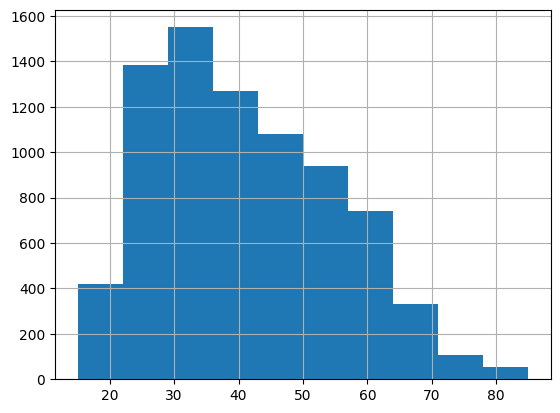

In [4]:
#select numeric and category columns
#numeric_cols = raw_df.select_dtypes(include=['int64', 'float64']).columns
#category_cols = raw_df.select_dtypes(include=['object']).columns
print('\n____________ Dataset info ____________')
print(raw_df.info())
print('\n____________ Some Data Examples ____________')
#print(raw_df.head(2))
print('\n____________ Features Values and count ____________')

#region Print all values and count of each feature
print(raw_df['age'].value_counts(),'\n')
print(raw_df['hours_a_week'].value_counts(),'\n') #-4 have 443 values => have to fillby a value
print(raw_df['industry'].value_counts(),'\n')
print(raw_df['occupation'].value_counts(),'\n')
print(raw_df['marital_status'].value_counts(),'\n')
print(raw_df['education'].value_counts(),'\n')
print(raw_df['race'].value_counts(),'\n')
print(raw_df['metropolitan'].value_counts(),'\n')
#endregion

raw_df['age'].hist()
print("Num:",len(raw_df[raw_df['hours_a_week'] == 0])) #5 giá trị 0
#raw_df['hours_a_week'].hist()


### Plotting hist for more insights

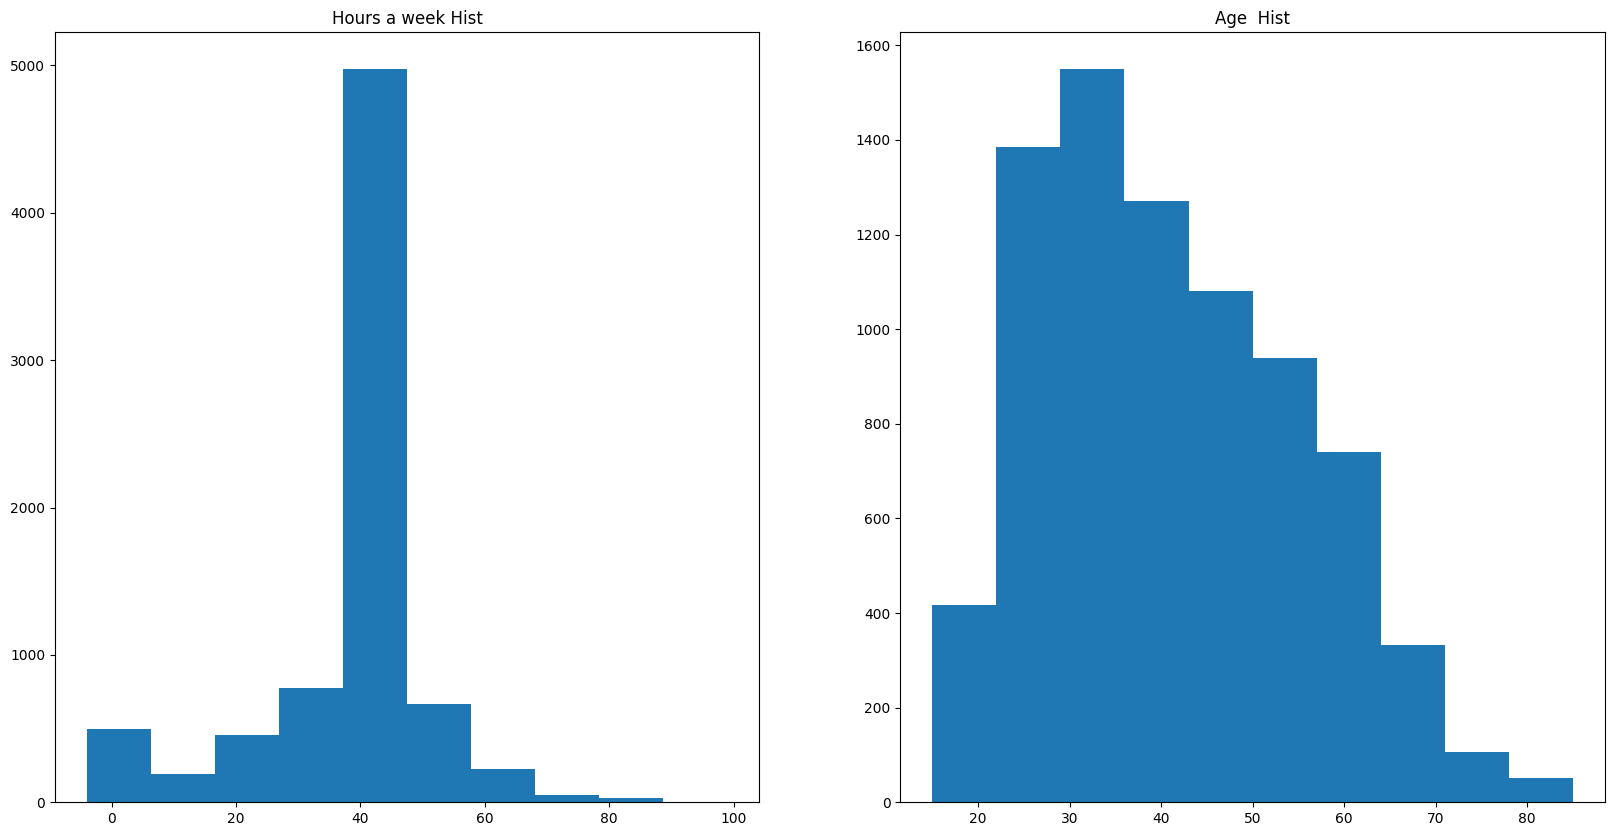

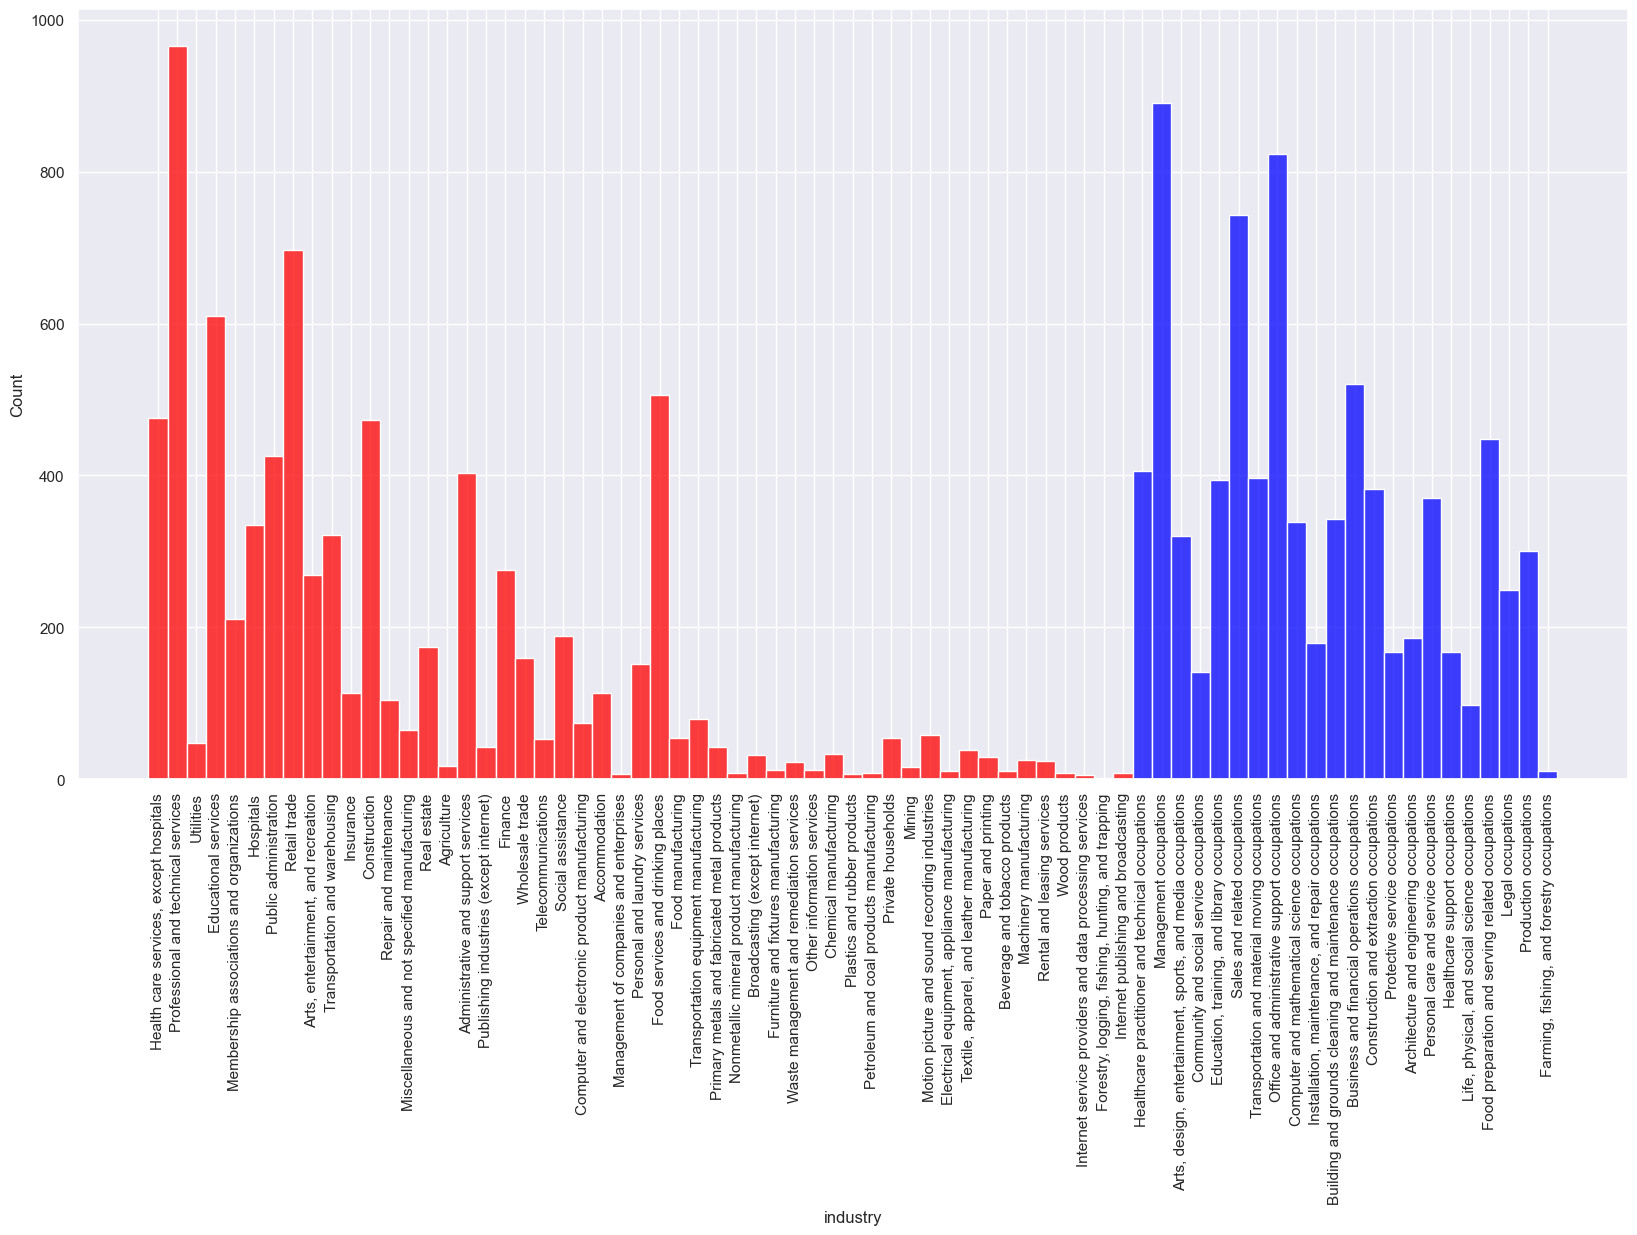

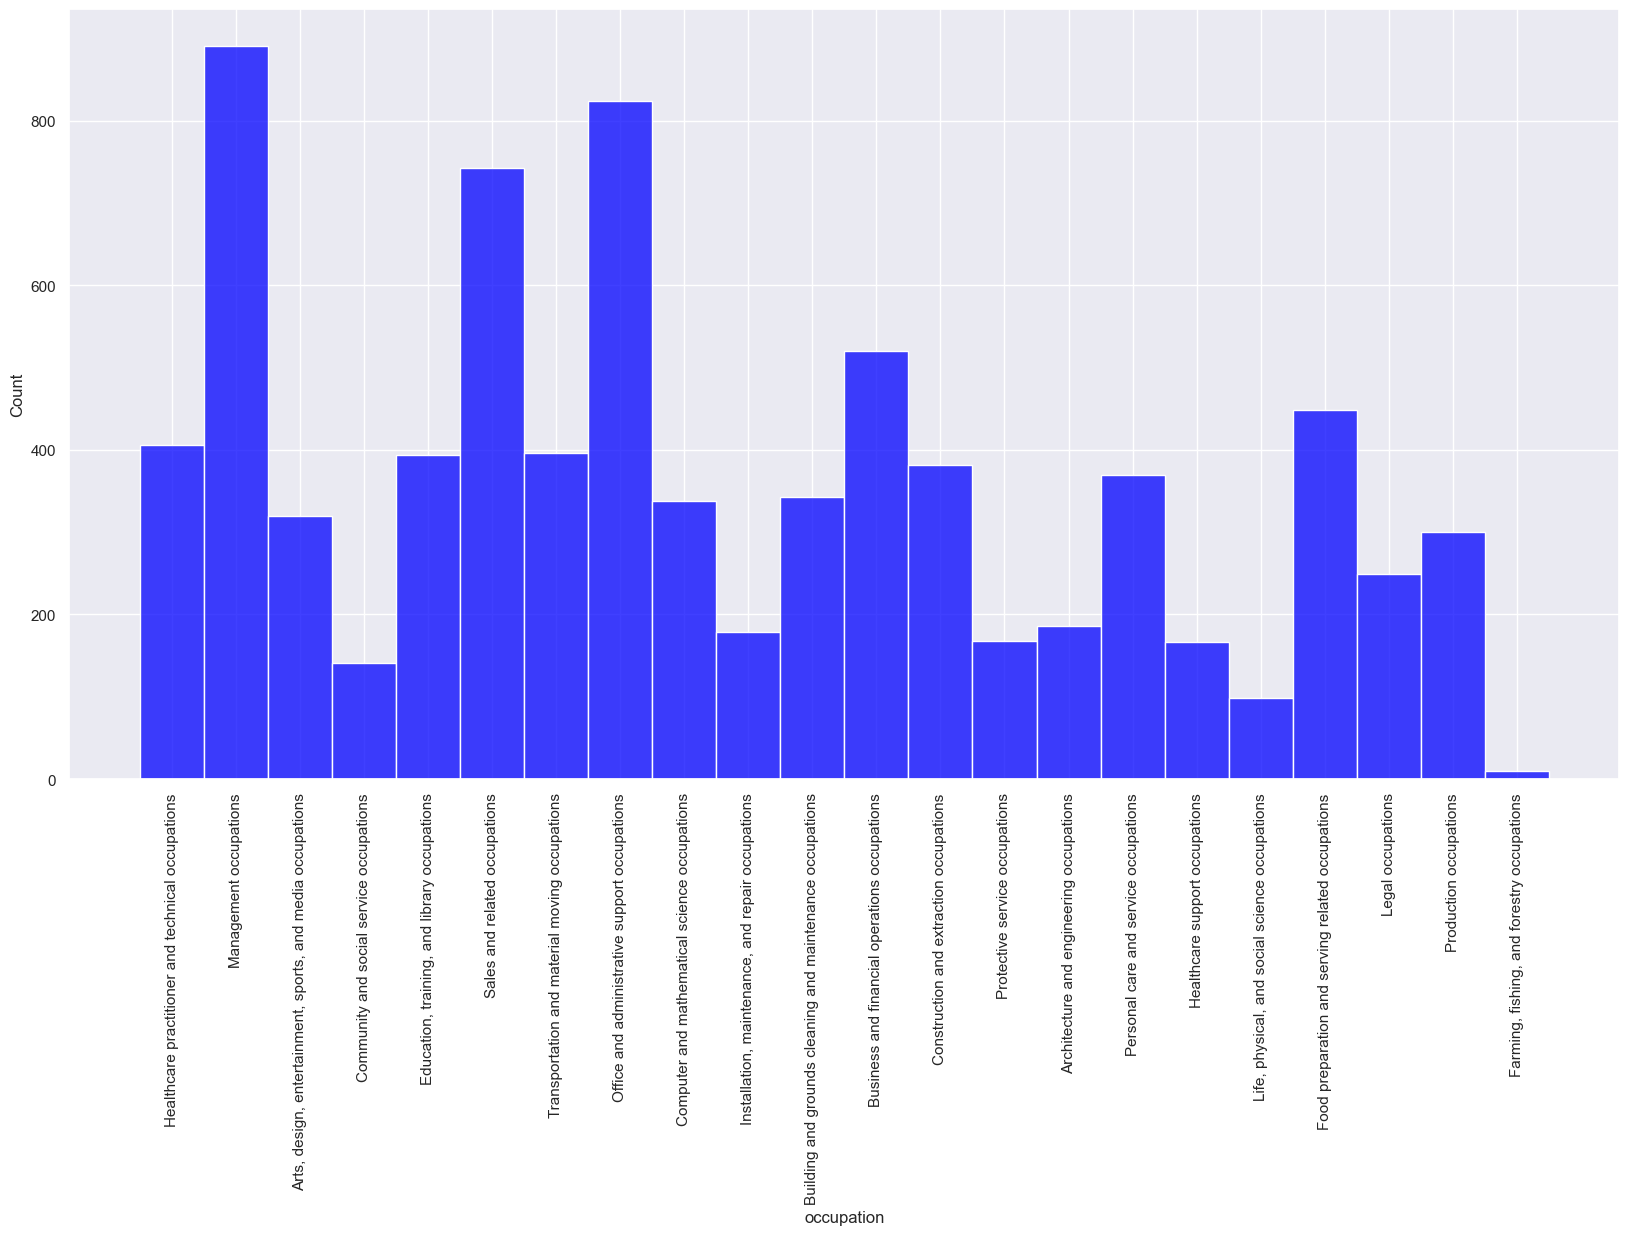

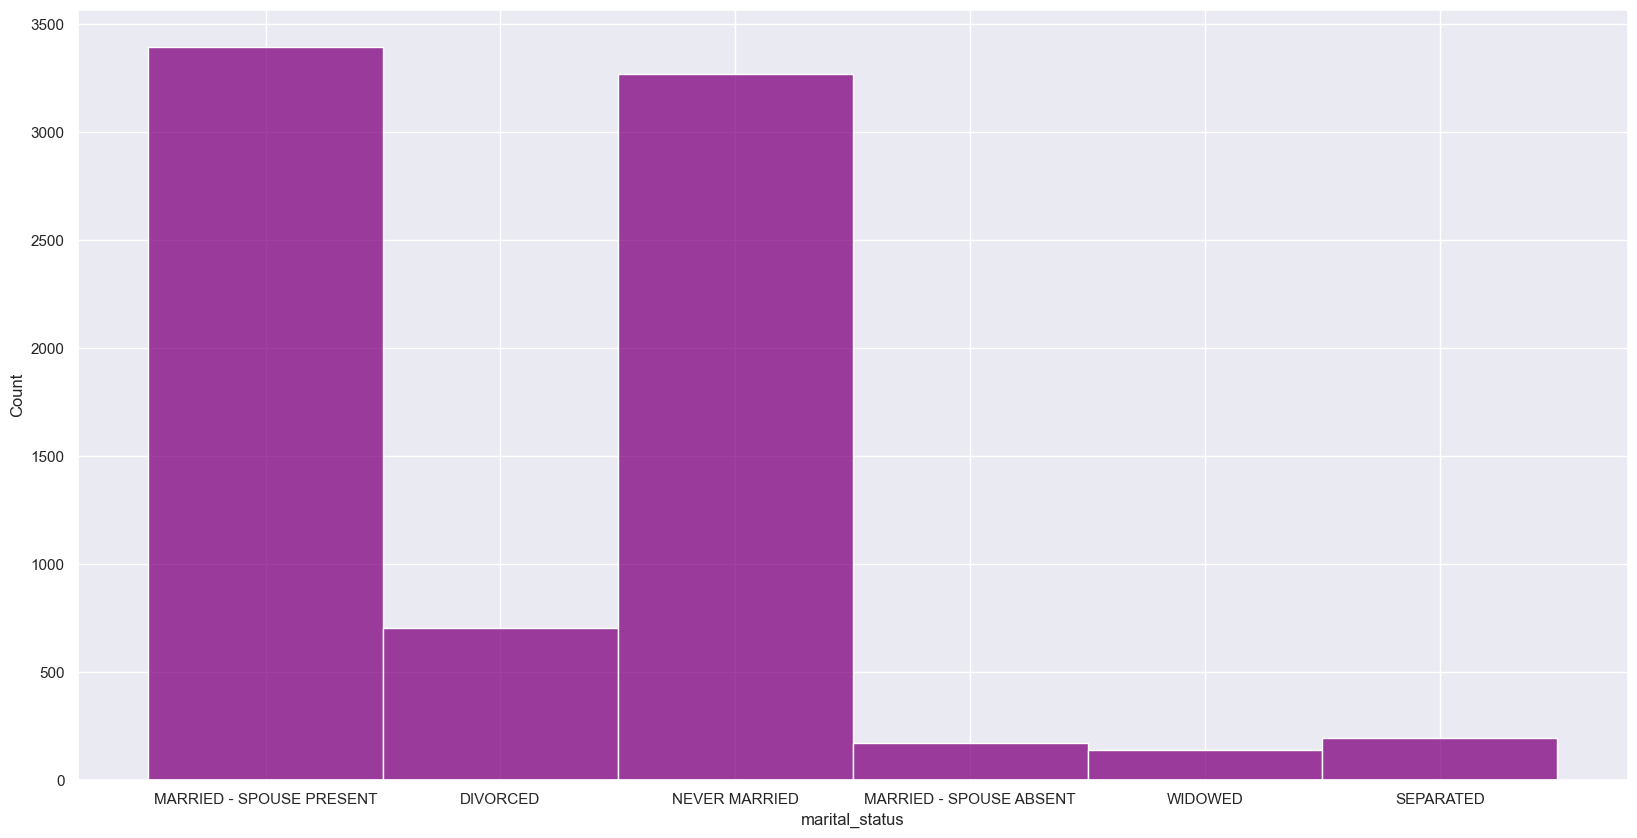

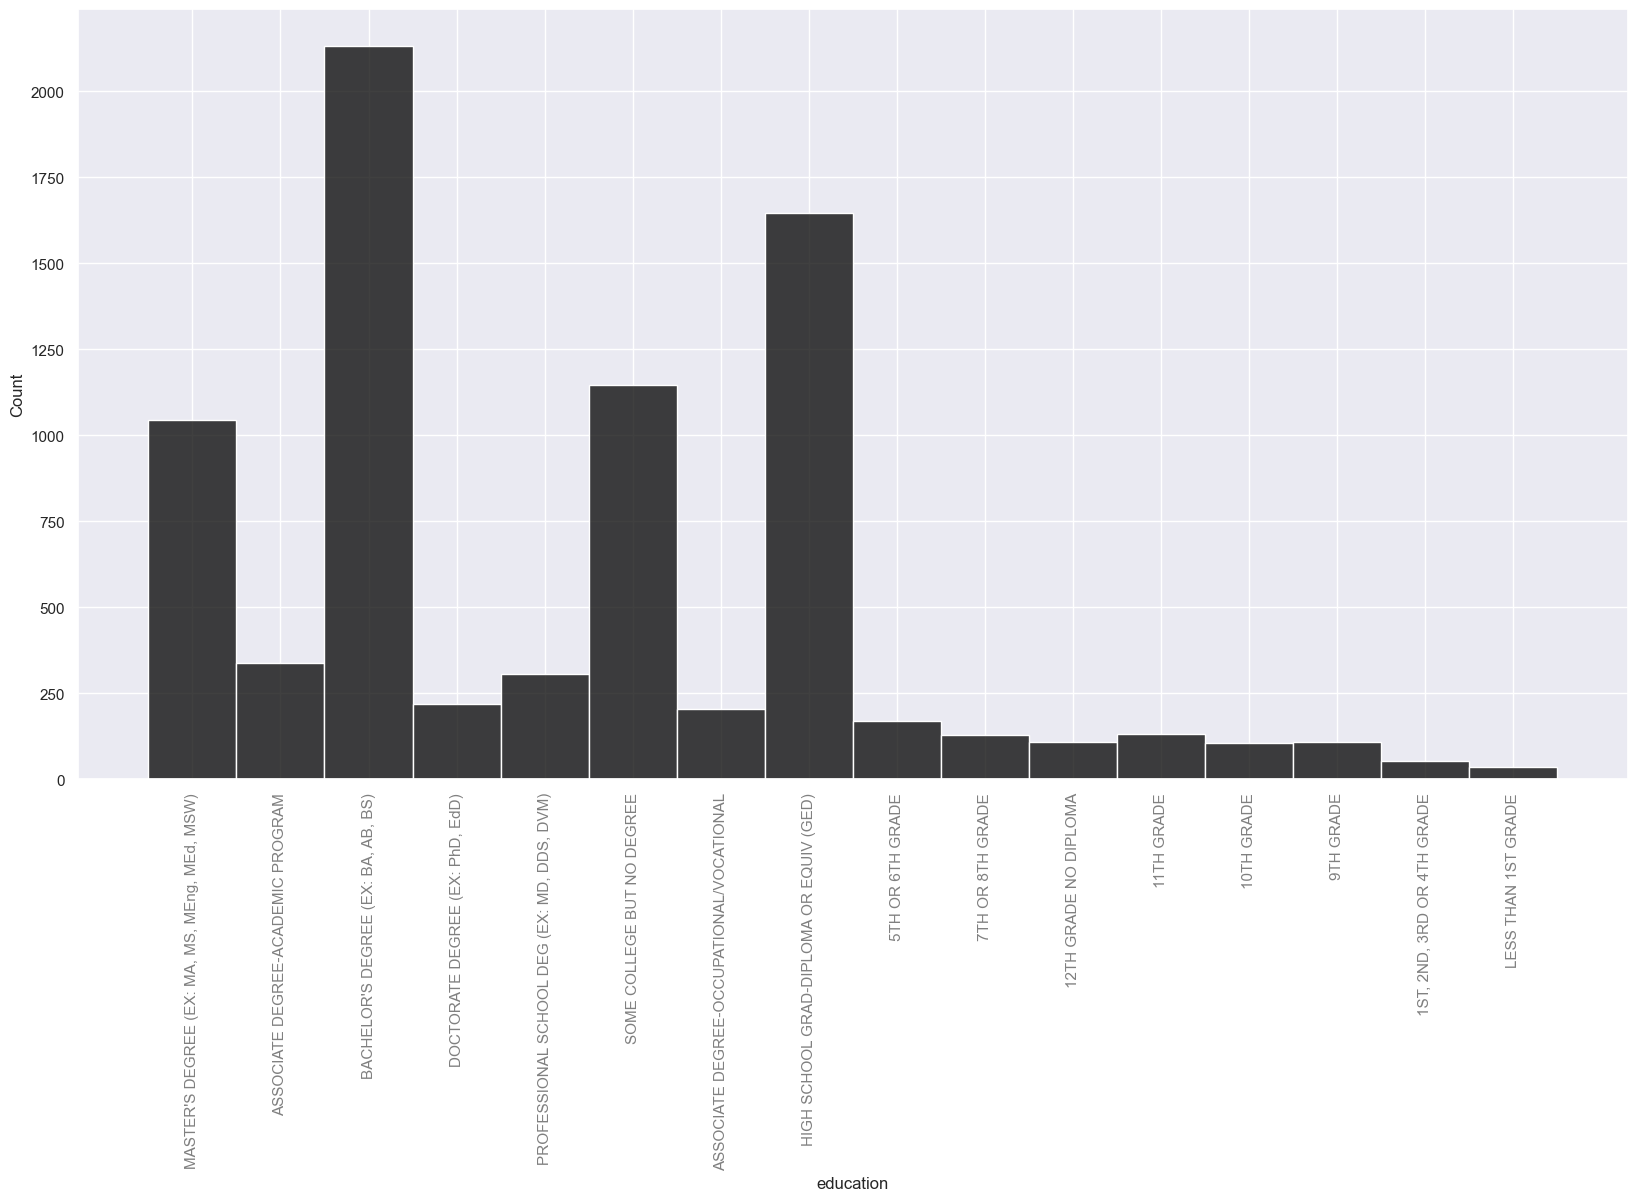

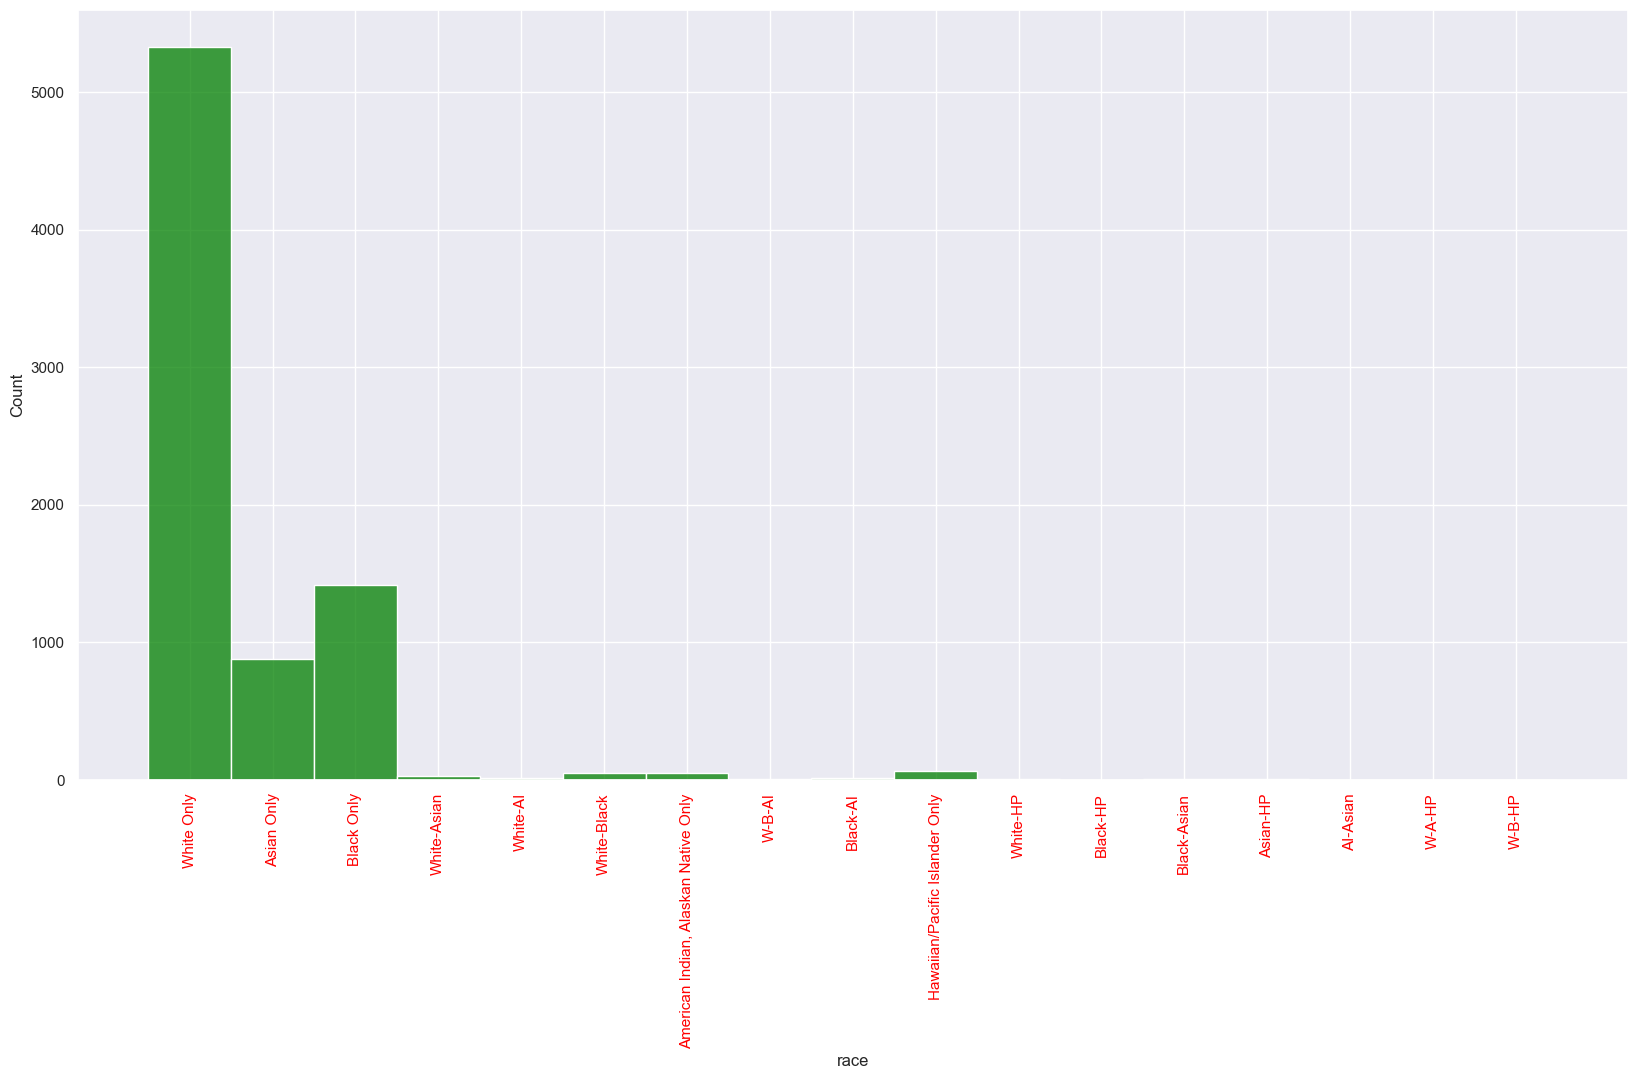

In [5]:
fig_numerical, axes_numerical = plt.subplots(1,2, figsize=(20,10))
axes_numerical[0].hist(raw_df['hours_a_week'])
axes_numerical[0].set_title('Hours a week Hist')
axes_numerical[1].hist(raw_df['age'])
axes_numerical[1].set_title('Age  Hist')
plt.show()

sns.set_theme(style='darkgrid')
fig_industry, ax_industry = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
ax_industry.tick_params(axis='x', labelrotation=90)
sns.histplot(raw_df['industry'], color='red',ax=ax_industry)
sns.histplot(raw_df['occupation'], color='blue',ax=ax_industry)

fig_occupation, ax_occupation = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
ax_occupation.tick_params(axis='x', labelrotation=90)
sns.histplot(raw_df['occupation'], color='blue',ax=ax_occupation)

fig_marital, ax_marital = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['marital_status'], color='purple',ax=ax_marital)

fig_education, ax_education = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['education'], color='black',ax=ax_education)
ax_education.tick_params(axis='x', labelrotation=90, labelcolor='gray')

fig_race, ax_race = plt.subplots(figsize=(20,10)) #only 1 ax inside this fig
sns.histplot(raw_df['race'], color='green',ax=ax_race, )
ax_race.tick_params(axis='x', labelrotation=90, labelcolor='red')

px.histogram(raw_df,'metropolitan')

## Preprocessing

### Replace value for binary value cols

In [6]:
'''
We can use 
+map function: data['sex'].replace({0:'Female',1:'Male'},inplace=True)
+apply function: data['sex'] = data['sex'].apply({1:'Male', 0:'Female'}.get)
+replace function: data['sex']=data['sex'].map({0:'Female',1:'Male'}) -> non-destructive and can run multiple time
'''

raw_df['sex'].replace({1: 'male', 2: 'female'}, inplace=True)
raw_df['ft/pt'].replace({1: 'full-time', 2: 'part-time'}, inplace=True)
raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision',
       'diff_climbing_walking','diff_dressing_bathing','disability_issue']] = raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision','diff_climbing_walking','diff_dressing_bathing','disability_issue']].replace({1: 1, 2: 0})
raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision',
       'diff_climbing_walking','diff_dressing_bathing','disability_issue']] = raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision','diff_climbing_walking','diff_dressing_bathing','disability_issue']].astype(bool)
print(raw_df.head())

   person_id  age     sex      ft/pt  hours_a_week  deaf_diff_hearing  \
0       4964   51    male  full-time            50              False   
1       5069   39  female  full-time            40              False   
2       5068   40    male  full-time            40              False   
3       5199   56  female  full-time            40              False   
4       5712   46    male  full-time            60              False   

   blind_diff_seeing_glass  diff_concerntrating_remembering_decision  \
0                    False                                     False   
1                    False                                     False   
2                    False                                     False   
3                    False                                     False   
4                    False                                     False   

   diff_climbing_walking  diff_dressing_bathing  disability_issue  \
0                  False                  False            

### Drop cols

In [7]:
keep_df = raw_df[['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision',
       'diff_climbing_walking','diff_dressing_bathing']]
raw_df.drop(['deaf_diff_hearing','blind_diff_seeing_glass','diff_concerntrating_remembering_decision','diff_climbing_walking','diff_dressing_bathing'], inplace=True, axis=1)
#print(keep_df.head())
#print(raw_df.head())

## Start Regression Set Up

In [8]:
from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score
from sklearn.feature_selection import SelectKBest, f_regression

### OneHotEnc and split into X and y

In [9]:

processed_df = raw_df.drop(['person_id'], axis=1).copy()
X = processed_df.drop(['hours_a_week'], axis=1)
X = pd.get_dummies(X, prefix='', prefix_sep='',drop_first=False) #OneHotEncoder convert all categorical into numerical
y = processed_df['hours_a_week']
# print(X.head())

### Scale X not y

In [10]:
scaler = StandardScaler()
X_feat_names = X.columns #save feature names

X_scaled = scaler.fit_transform(X) #return numpy array lose column name
X_scaled = pd.DataFrame(X_scaled, columns=X_feat_names) #convert back to dataframe
print(X_scaled.head())

        age  disability_issue    female      male  full-time  part-time  \
0  0.745009         -0.167557 -0.944507  0.944507   0.420094  -0.420094   
1 -0.115786         -0.167557  1.058754 -1.058754   0.420094  -0.420094   
2 -0.044053         -0.167557 -0.944507  0.944507   0.420094  -0.420094   
3  1.103673         -0.167557  1.058754 -1.058754   0.420094  -0.420094   
4  0.386344         -0.167557 -0.944507  0.944507   0.420094  -0.420094   

   Accommodation  Administrative and support services  Agriculture  \
0      -0.121213                             -0.23227    -0.046518   
1      -0.121213                             -0.23227    -0.046518   
2      -0.121213                             -0.23227    -0.046518   
3      -0.121213                             -0.23227    -0.046518   
4      -0.121213                             -0.23227    -0.046518   

   Arts, entertainment, and recreation  ...  Riverside-San Bernardino-Ontario  \
0                            -0.188085  ...    

## Fine Tune Step

### Feature Selection (Fine tune dc)


In [11]:
#rs = RandomOverSampler()
#rs = SMOTE(random_state=42)
# X_resampled, y_resampled = rs.fit_resample(X, y) #error or not effective

# perform feature selection using SelectKBest and f_regression | an alternative to sampling methods | feature selection is for regression usually | sampling is for classification usually
selector = SelectKBest(f_regression, k=15)
X_selected = selector.fit_transform(X_scaled, y) #now a numpy array

# print the selected feature names
selected_cols = X_scaled.columns[selector.get_support()]
X_selected = pd.DataFrame(X_selected, columns=selected_cols)
# print(selected_cols.tolist())
# print(X_selected.head())


### Plot Correlation for insights


hours_a_week                                        1.000000
full-time                                           0.527569
Management occupations                              0.110745
BACHELOR'S DEGREE (EX: BA, AB, BS)                  0.080587
Washington-Arlington-Alexandria                     0.079864
PROFESSIONAL SCHOOL DEG (EX: MD, DDS, DVM)          0.078451
Professional and technical services                 0.075506
male                                                0.075199
MASTER'S DEGREE (EX: MA, MS, MEng, MEd, MSW)        0.072958
female                                             -0.075199
HIGH SCHOOL GRAD-DIPLOMA OR EQUIV (GED)            -0.076363
11TH GRADE                                         -0.086333
Food services and drinking places                  -0.094093
Food preparation and serving related occupations   -0.101632
Personal care and service occupations              -0.105616
part-time                                          -0.527569
Name: hours_a_week, dtyp

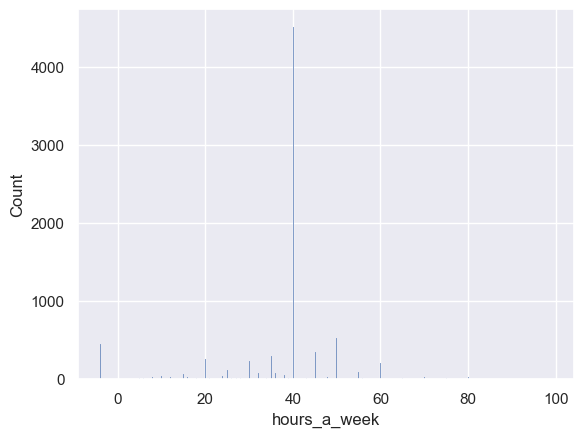

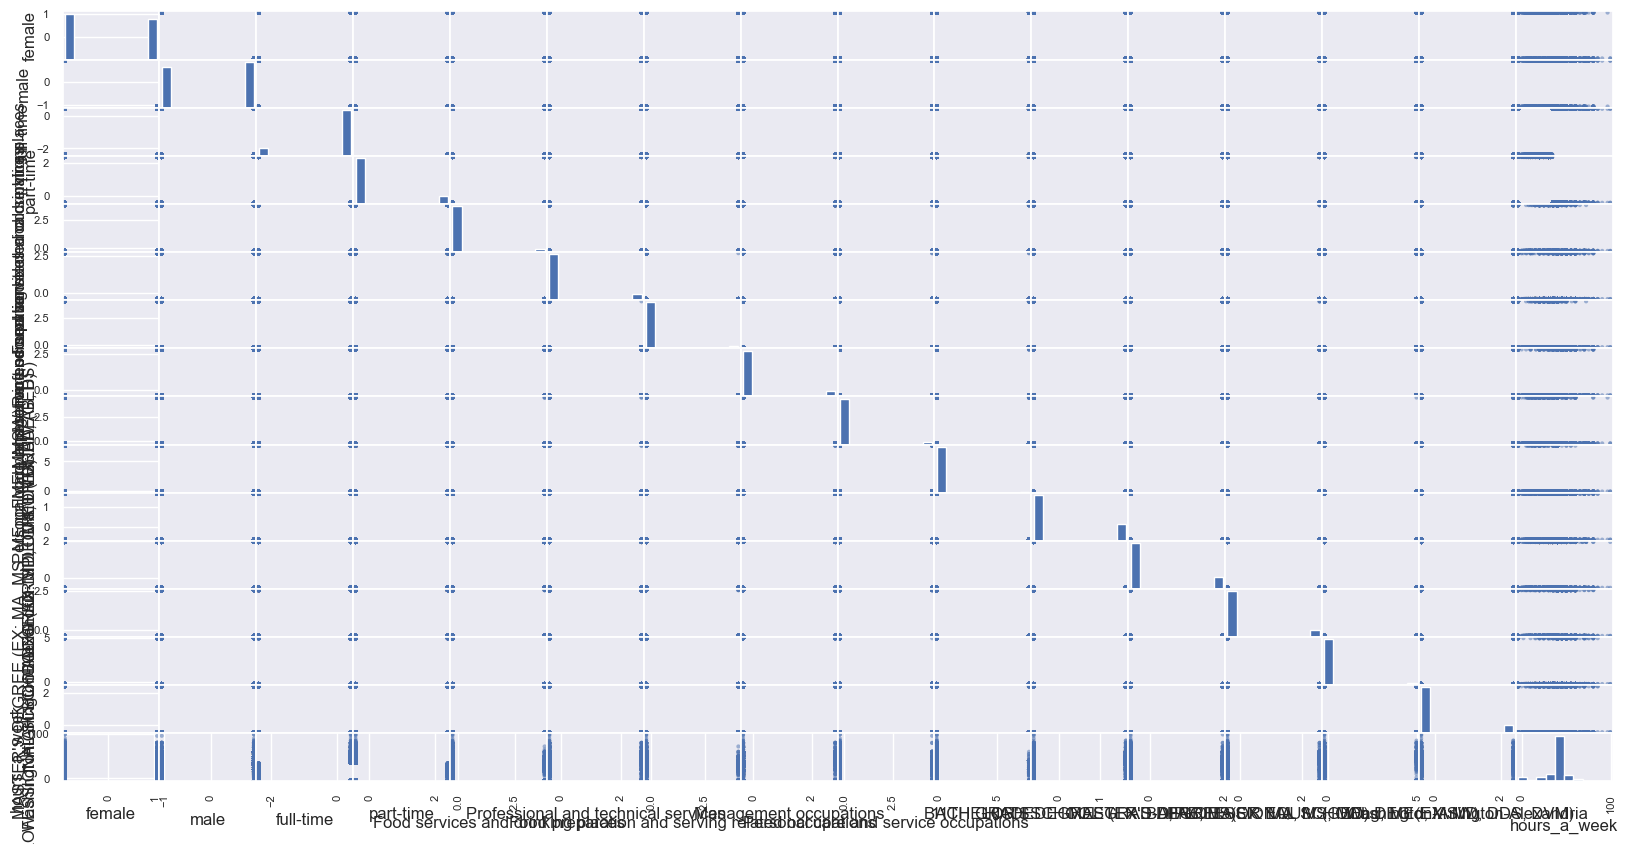

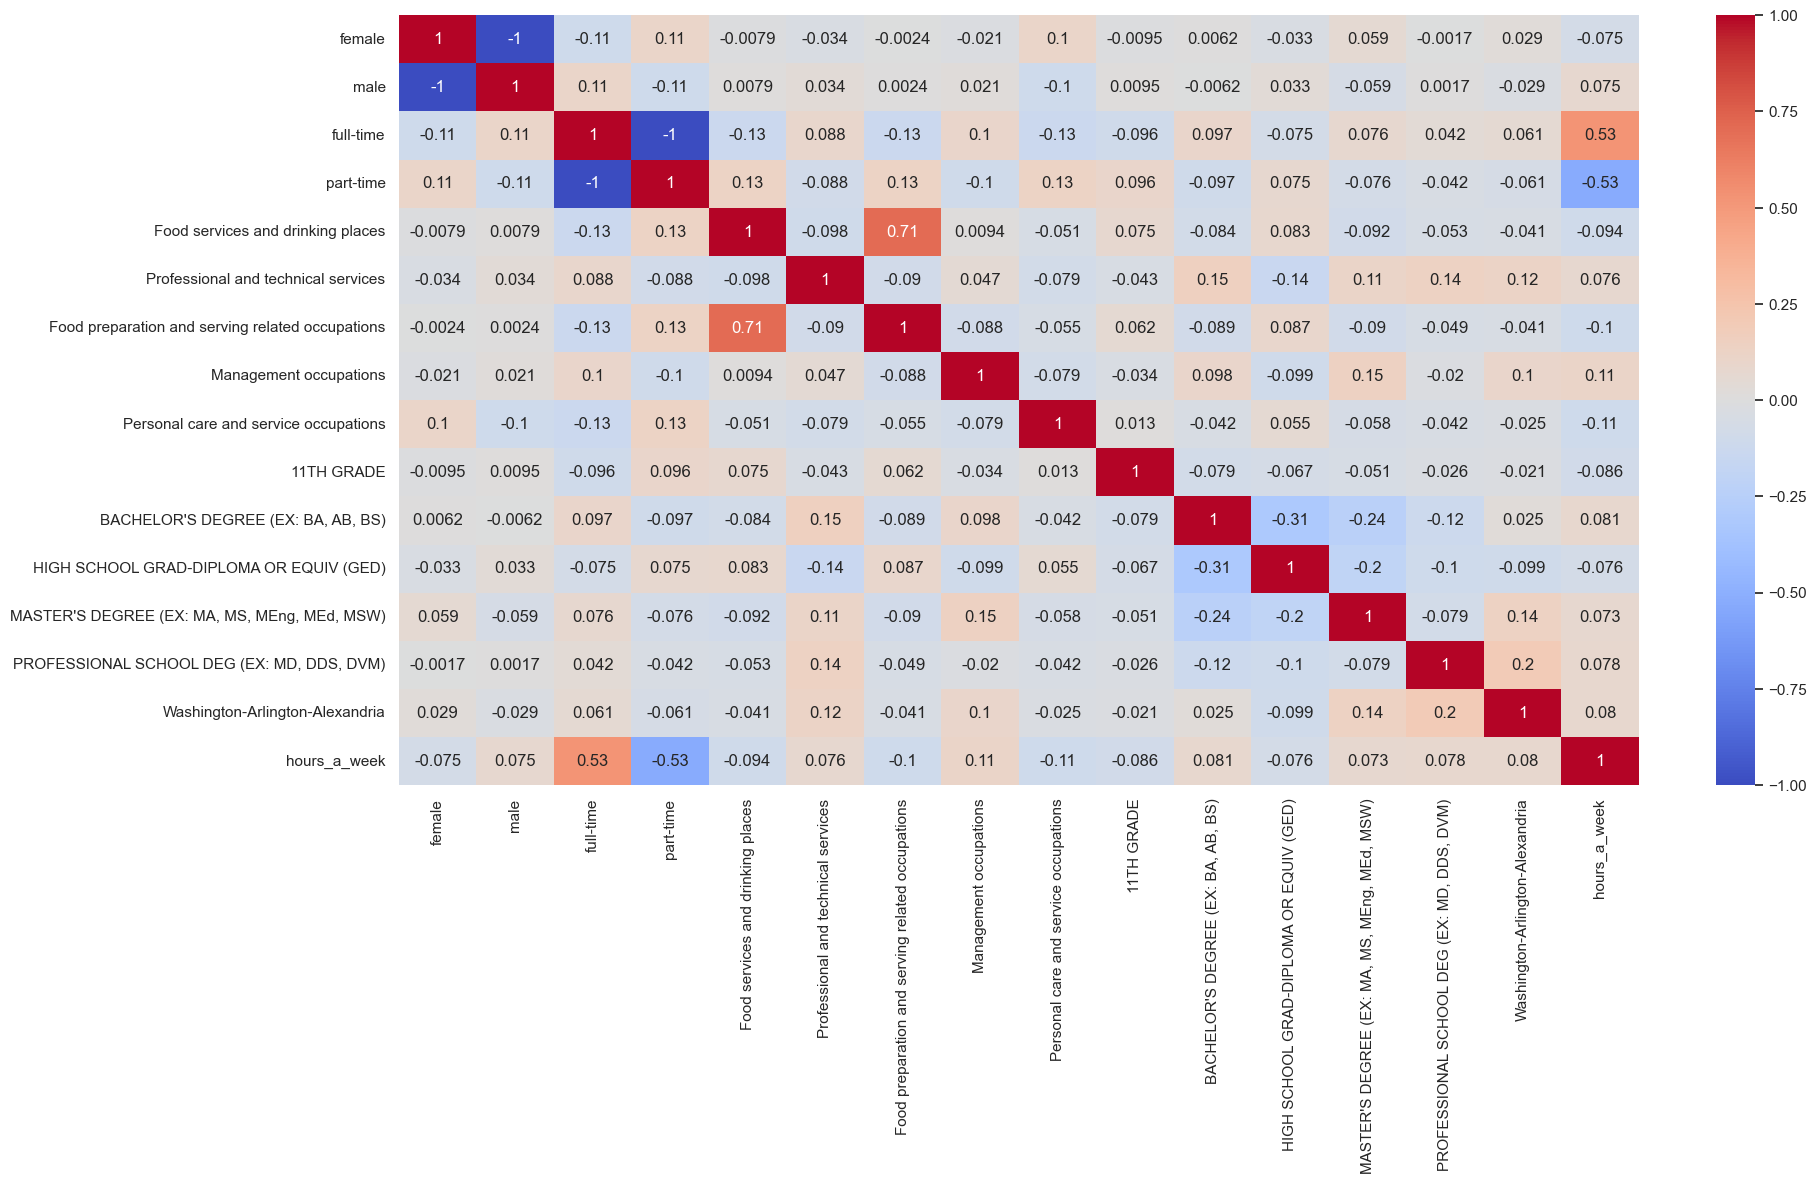

In [12]:
sns.histplot(y) #hist to gram show that result can be biased to 40 hours a week
corr_df = pd.concat([X_selected,y], axis=1)
print(corr_df.corr()['hours_a_week'].sort_values(ascending=False))

scatter_matrix(corr_df[corr_df.select_dtypes(include=['int64','float64']).columns.tolist()]
               , figsize=(20,10))

fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr_df.corr(),annot=True, ax=ax, cmap='coolwarm')
plt.show()

### Split Data into train and test set (Fine tune dc)

(6298, 15) (1575, 15) (6298,) (1575,)


array([<AxesSubplot: title={'center': 'female'}>,
       <AxesSubplot: title={'center': 'male'}>,
       <AxesSubplot: title={'center': 'full-time'}>,
       <AxesSubplot: title={'center': 'part-time'}>,
       <AxesSubplot: title={'center': 'Food services and drinking places'}>,
       <AxesSubplot: title={'center': 'Professional and technical services'}>,
       <AxesSubplot: title={'center': 'Food preparation and serving related occupations'}>,
       <AxesSubplot: title={'center': 'Management occupations'}>,
       <AxesSubplot: title={'center': 'Personal care and service occupations'}>,
       <AxesSubplot: title={'center': '11TH GRADE'}>,
       <AxesSubplot: title={'center': "BACHELOR'S DEGREE (EX: BA, AB, BS)"}>,
       <AxesSubplot: title={'center': 'HIGH SCHOOL GRAD-DIPLOMA OR EQUIV (GED)'}>,
       <AxesSubplot: title={'center': "MASTER'S DEGREE (EX: MA, MS, MEng, MEd, MSW)"}>,
       <AxesSubplot: title={'center': 'PROFESSIONAL SCHOOL DEG (EX: MD, DDS, DVM)'}>,
       <Axes

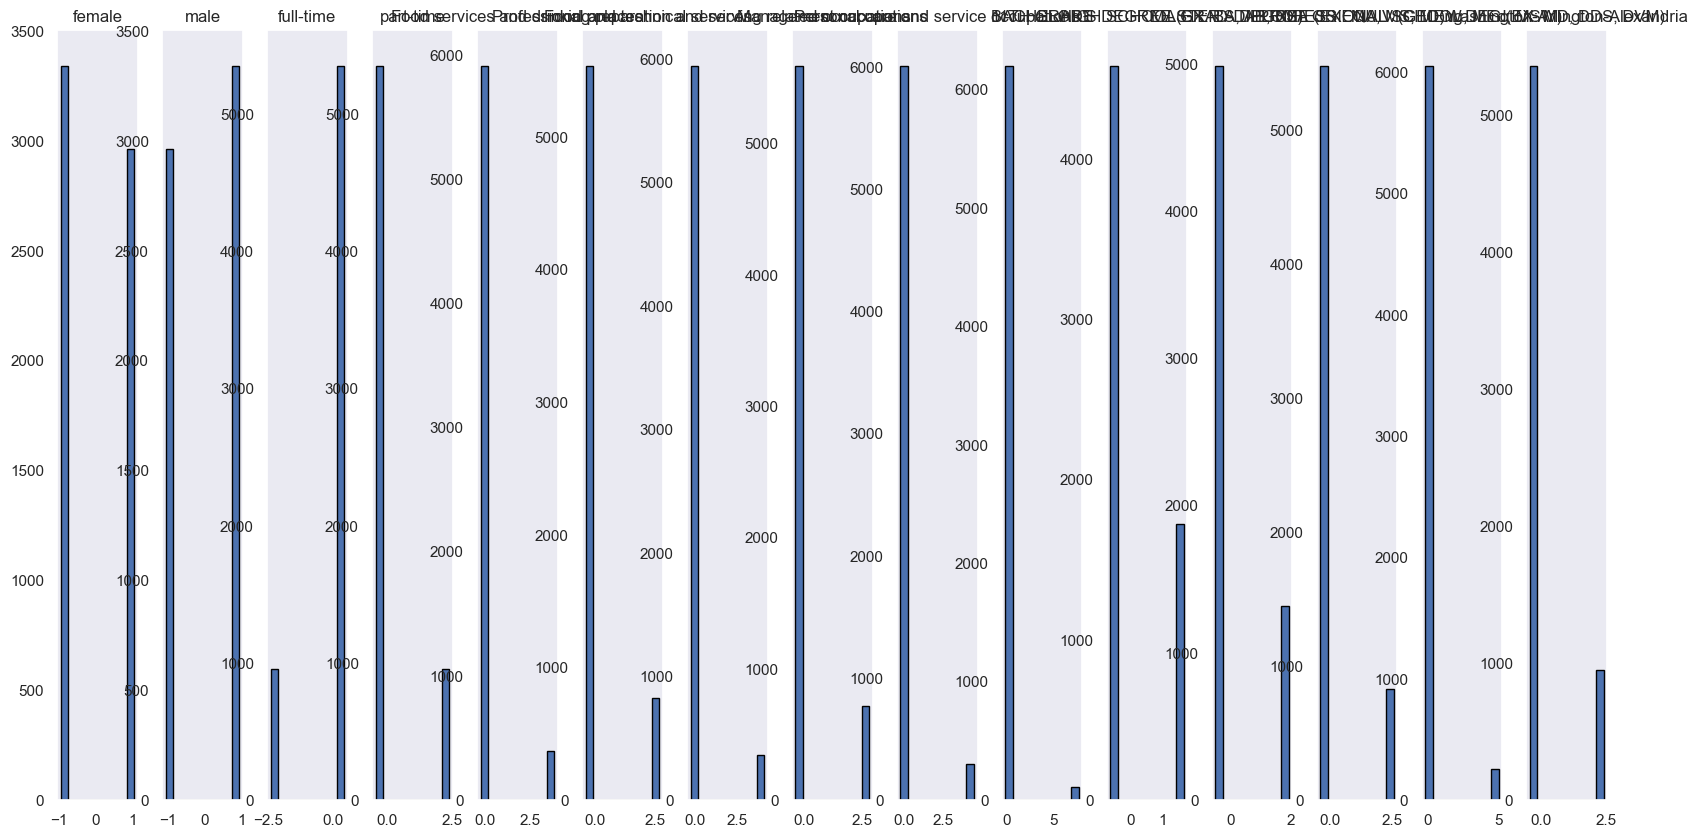

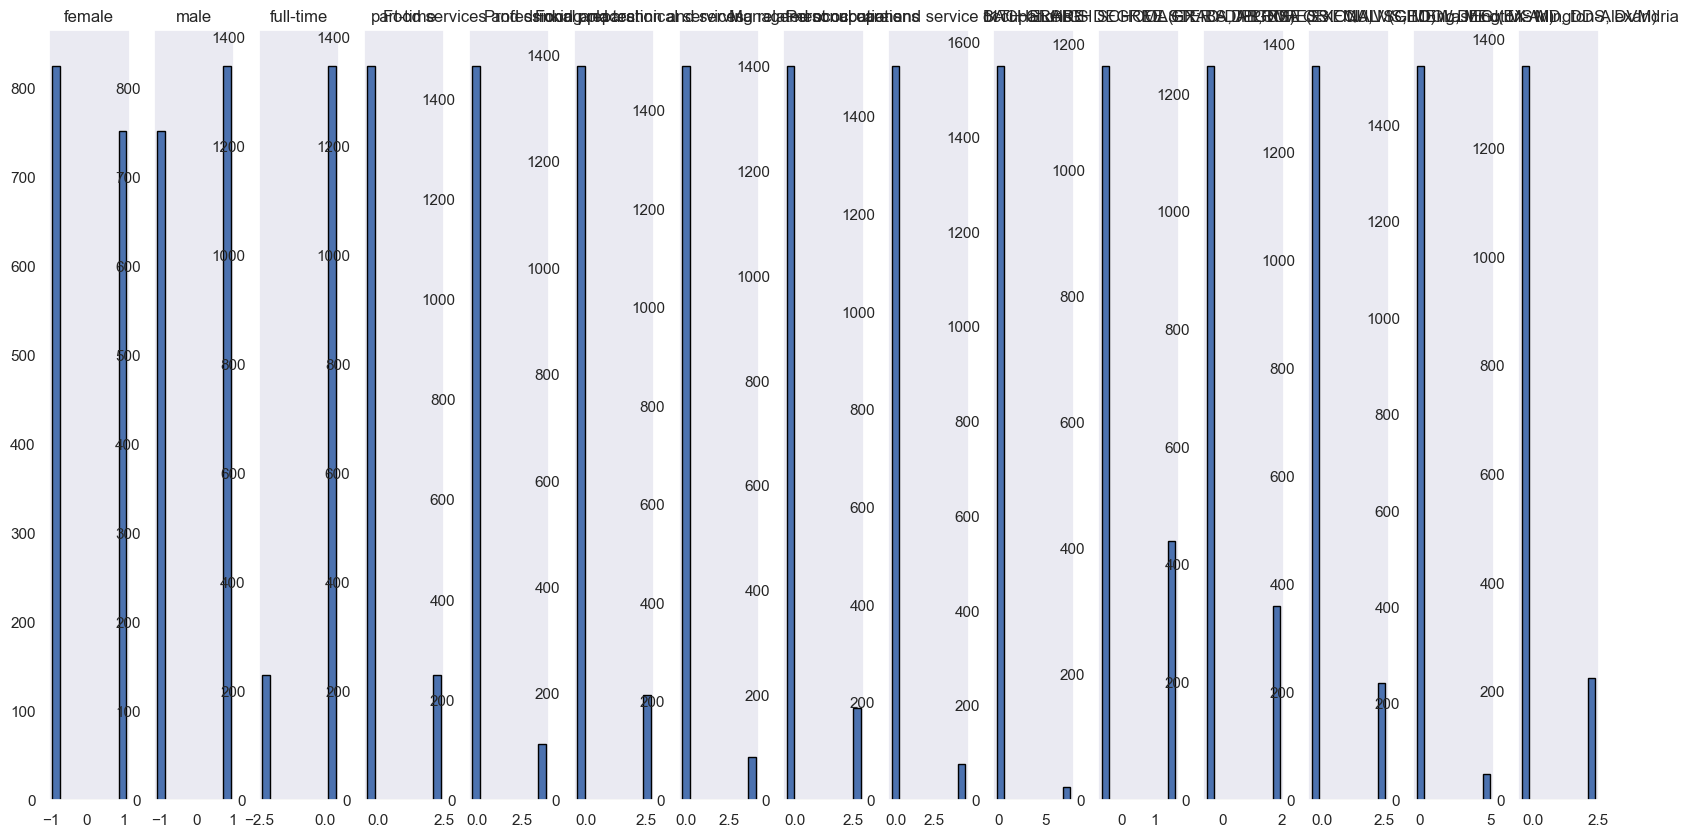

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
fig, axes_train = plt.subplots(1, X_train.shape[1], figsize=(20,10))
#create histogram for each column in DataFrame
X_train.hist(ax=axes_train, edgecolor='black', grid=False)

fig, axes_test = plt.subplots(1, X_test.shape[1], figsize=(20,10))
X_test.hist(ax=axes_test, edgecolor='black', grid=False)

## Mulitple Linear regression for hours a week

In [14]:
# fit the multiple linear regression lr_model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# evaluate the lr_model on the testing set
y_pred = lr_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - ((1-r2)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))

# print the evaluation metrics
print('Mean squared error:', mse)
print('R-squared:', r2)
print('Adjusted R-squared:', adj_r2)

# print the coefficients and p-values
coef_df = pd.DataFrame({'Variable': X_train.columns, 'Coefficient': lr_model.coef_})
# pvalue_df = pd.DataFrame({'Variable': X_train.columns, 'P-value': stats.coef_pval(lr_model, X_train, y_train)})
# result_df = pd.merge(coef_df, pvalue_df, on='Variable')
print(coef_df)



Mean squared error: 131.56624925921597
R-squared: 0.30495491414596687
Adjusted R-squared: 0.29826750151748027
                                            Variable   Coefficient
0                                             female  4.910081e+12
1                                               male  4.910081e+12
2                                          full-time -2.253143e+12
3                                          part-time -2.253143e+12
4                  Food services and drinking places -1.429062e-01
5                Professional and technical services -7.080078e-03
6   Food preparation and serving related occupations -2.037544e-01
7                             Management occupations  6.824799e-01
8              Personal care and service occupations -3.476562e-01
9                                         11TH GRADE -3.164291e-01
10                BACHELOR'S DEGREE (EX: BA, AB, BS)  5.185585e-01
11           HIGH SCHOOL GRAD-DIPLOMA OR EQUIV (GED) -5.902100e-02
12      MASTER'S DE

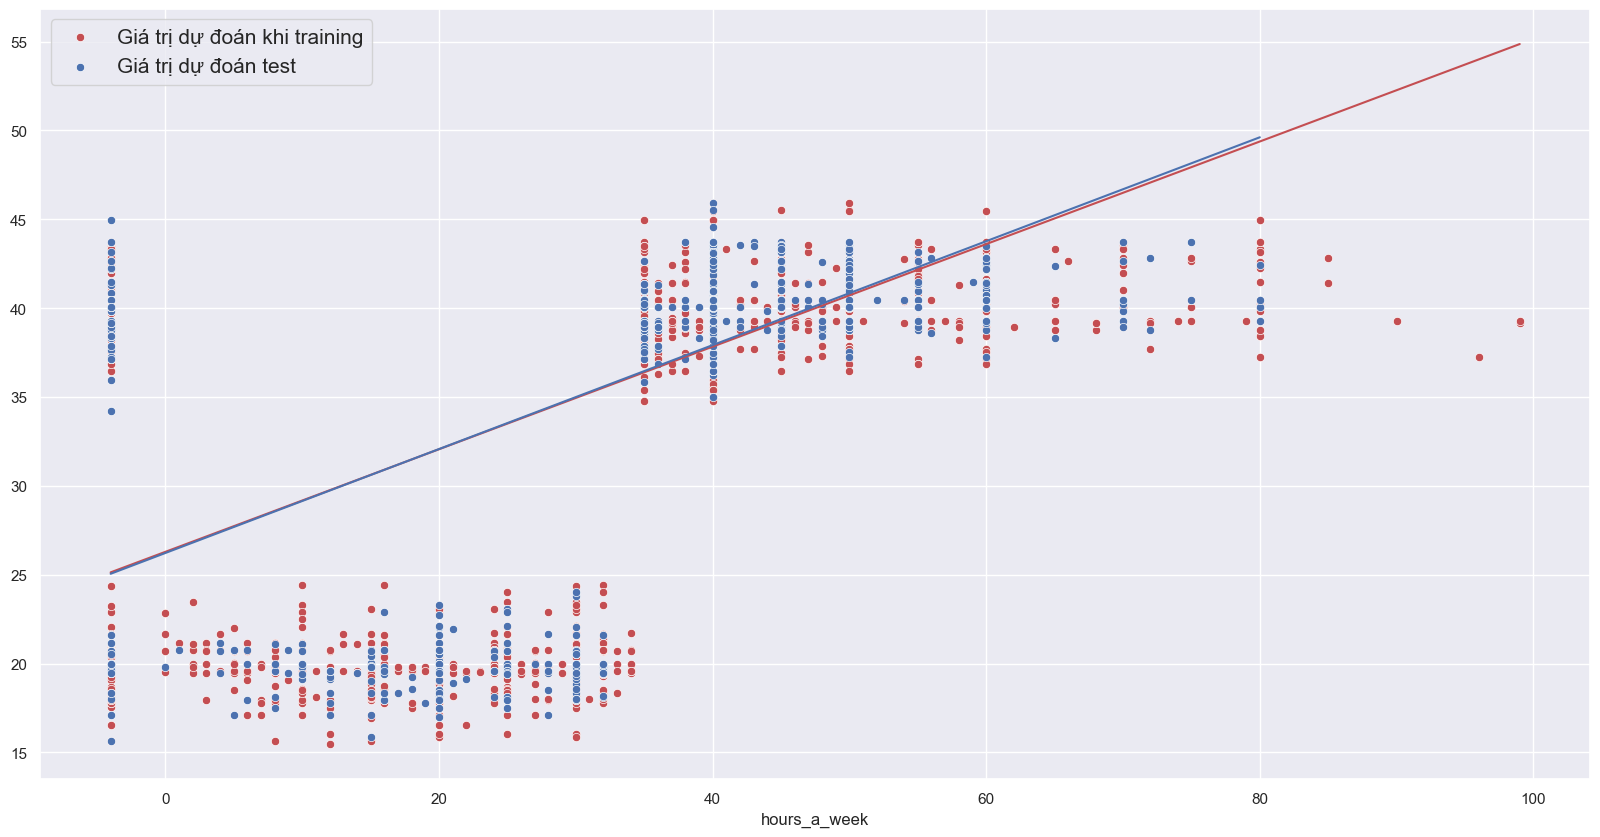

In [15]:
fig, axes = plt.subplots(figsize=(20,10))

y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)
# axes[0].scatter(x=y_train, y=y_train_pred, color='blue', alpha=0.2)
# axes[0].plot(y_train, y_train_pred, color='blue', linewidth=1)
# axes[0].scatter(x=y_test, y=y_test_pred, color='red', alpha=0.2)
# axes[0].plot(y_test, y_test_pred, color='red', linewidth=1)
sns.scatterplot(x=y_train, y=y_train_pred, color='r')
sns.scatterplot(x=y_test, y=y_test_pred, color='b')
plt.plot(np.unique(y_train), np.poly1d(np.polyfit(y_train, y_train_pred, 1))(np.unique(y_train)), 'r')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, y_test_pred, 1))(np.unique(y_test)), 'b')

plt.legend(['Giá trị dự đoán khi training', 'Giá trị dự đoán test'], fontsize=15)
plt.show()

In [16]:
print(pd.DataFrame({'Thực tế':y_test, 'Dự đoán':y_test_pred}).head(10))
print('Độ chính xác của model',explained_variance_score(y_train, y_train_pred))
print('Độ lệch giá trị trung vị:', np.sqrt(mse))

      Thực tế    Dự đoán
7045       40  42.202248
503        40  38.770414
6500        6  17.925958
5386       20  19.978961
2298       12  19.568710
5448       40  38.915523
1703       -4  21.599456
4649       40  42.591408
2233       70  39.283104
5039       40  39.159574
Độ chính xác của model 0.2873283978839365
Độ lệch giá trị trung vị: 11.470233182425542
